In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 20;


<IPython.core.display.Javascript object>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
import time

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score, roc_auc_score, classification_report
from yellowbrick.model_selection import FeatureImportances

import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style = 'white')

In [3]:
# data = pd.read_csv("../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv", index_col='customerID')
data = pd.read_csv("../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data = data.drop(columns=['customerID'])
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [4]:
data[data['tenure'] == 0]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)           52.55           NaN    No  
753                Mailed check           20.25           NaN    No  
936                Mailed check           80.85           NaN    No  
1082               Mailed check           25.75           NaN    No  
1340    Credit card (automatic)           56.05           NaN    No  
3331               Mailed check           19.85           NaN    No  
3826               Mailed check           25.35           NaN    No  
4380               Mailed check           20.00           

There are `11` rows that does not have TotalCharges, and tenure is `zero`.
Drop them all

In [5]:
data.dropna(subset=['TotalCharges'], inplace=True)
parsed_shape = data.shape
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


Inspect data to check for remaining mission values and column with unique values

In [6]:
def dataoveriew(df, message):
    print(f'{message}:\n')
    print("Rows:", df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nFeatures:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())

In [7]:
dataoveriew(data, 'Overview of the dataset')

Overview of the dataset:

Rows: 7032

Number of features: 20

Features:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values: 0

Unique values:
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64


View profile report to get more insight

In [8]:
# import pandas_profiling as pp
import ydata_profiling as pp

profile = pp.ProfileReport(data)
profile


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### About Dataset

This data contains information about a fictitious telecom company that provided home phone and Internet services to 7,043 California residents in the third quarter. This information shows whether a customer has left, remained or opted to sign up for the service.

#### Variables

* CustomerID: A unique ID that identifies each customer.

* Gender: The customer’s gender: Male, Female

* Age: The customer’s current age, in years, at the time the fiscal quarter ended.

* Senior Citizen: Indicates if the customer is 65 or older: Yes, No

* Married (Partner): Indicates if the customer is married: Yes, No

* Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

* Number of Dependents: Indicates the number of dependents that live with the customer.

* Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

* Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

* Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

* Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

* Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

* Device Protection Plan: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

* Premium Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

* Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

* Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

* Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

* Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

* Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

* Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

* Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

* Tenure: Indicates the total amount of months that the customer has been with the company.

* Churn: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

# Feature Engineering: Picking preprocessing method
## Numerical values
* Using RobustScaler (median = 0, interquartile range (IQR) = 1) instead of StandardScaler (mean=0, std=1)

    Because tennure, monthlycharge, totalchanges are not gaussian distribution
    
## Categorical values
* OneHotEncoder

## Boolean values
* LabelEncoder

In [9]:
# Separate all binary + Categorical Values + Boolean values
#target column
target_col = ["Churn"]
data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
data['Churn'].replace(to_replace='No',  value=0, inplace=True)

# Y = data['Churn']
# X = data.copy().drop(columns=['Churn'])
# Y = data['Churn']
X = data.copy()

#Binary columns with 2 values
# ['gender',
#  'SeniorCitizen',
#  'Partner',
#  'Dependents',
#  'PhoneService',
#  'PaperlessBilling']
bin_cols = [x for x in X.nunique()[X.nunique() == 2].keys().tolist() if x not in target_col]

#categorical columns
#number of levels in feature to be a categorical feature
nlevels = 11
cat_cols = list(set(X.nunique()[X.nunique()<nlevels].keys().tolist() 
                    + X.select_dtypes(include='object').columns.tolist()))

# ['OnlineBackup',
#  'StreamingMovies',
#  'PaymentMethod',
#  'Contract',
#  'OnlineSecurity',
#  'DeviceProtection',
#  'TechSupport',
#  'StreamingTV',
#  'MultipleLines',
#  'InternetService']
cat_cols = [x for x in cat_cols if x not in target_col + bin_cols]

#numerical columns
# ['tenure', 'MonthlyCharges', 'TotalCharges']
num_cols = [x for x in X.columns if x not in cat_cols + bin_cols + target_col]


from sklearn.preprocessing import LabelEncoder, RobustScaler, OneHotEncoder


# Categorical Values with OneHotEncoder
# Apply one-hot encoder to each column with categorical data
X = pd.get_dummies(X, columns=cat_cols)


# Transform boolean value with LabelEncoder
label_encoder = LabelEncoder()
for bin_col in bin_cols:
    X[bin_col] = label_encoder.fit_transform(X[bin_col])
# gender: Female = 0, Male = 1, yes=1, no=0

# Transform numerical value with RobustScaler
rs = RobustScaler()
X[num_cols] = rs.fit_transform(X[num_cols])

# X.isnull().sum()
X.shape

(7032, 41)

<AxesSubplot: >

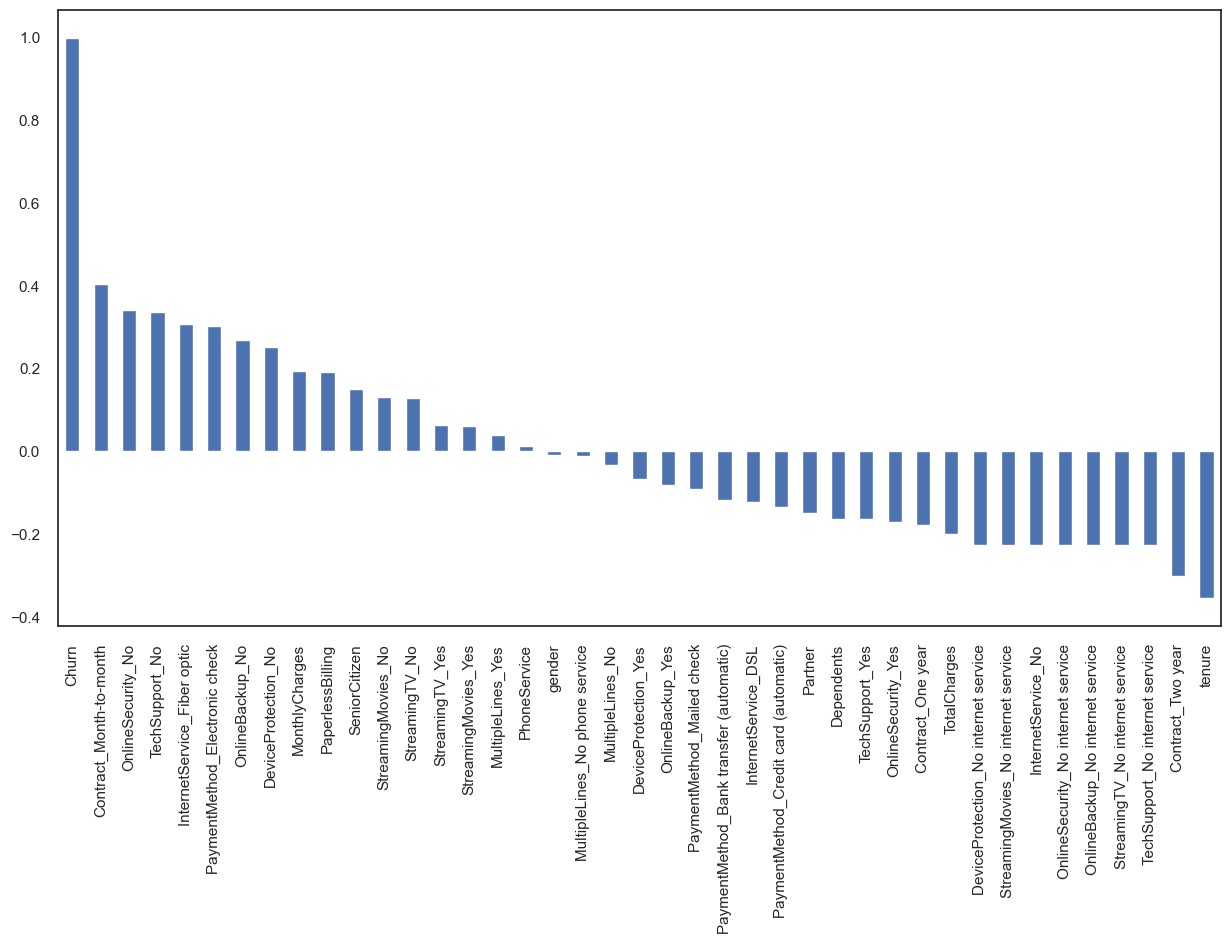

In [10]:

#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
X.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')


In [11]:
X.corr()['Churn'].sort_values(ascending = False)

Churn                                      1.000000
Contract_Month-to-month                    0.404565
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
MonthlyCharges                             0.192858
PaperlessBilling                           0.191454
SeniorCitizen                              0.150541
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
PhoneService                               0.011691
gender                                    -0.008545
MultipleLines_No phone service            -0.011691
MultipleLine

In [12]:
y = X['Churn']
X = X.copy().drop(columns=['Churn'])
X.shape

(7032, 40)

In [13]:
X_train_original, X_test, y_train_original, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# The data is imbalanced. Therefore I use smote method to oversample the data
oversample = SMOTE(random_state=0, k_neighbors=5)
X_train_smote, y_train_smote = oversample.fit_resample(X_train_original, y_train_original)

In [14]:
def model_performance(model, X_train, y_train, X_test, y_test, model_name="", show_stat=True):
    t0 = time.time()
    result = model.fit(X_train, y_train)
    training_time_seconds = time.time() - t0
    prediction_test = model.predict(X_test)
    # Print the prediction accuracy
    # print ("accuracy score: ", accuracy_score(y_test, prediction_test))
    # print ("f1 score: ", f1_score(y_test, prediction_test))


    #confusion matrix
    conf_matrix = confusion_matrix(y_test, prediction_test)
    #roc_auc_score
    model_roc_auc = roc_auc_score(y_test, prediction_test) 
    if show_stat:
        print("Model name: ", model_name)
        print('Algorithm:', type(model).__name__)
        print(classification_report(y_test, prediction_test))
        print("Area under the roc curve:", model_roc_auc,"\n")

        ax = sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='g')
        ax.set_title('Confusion Matrix\n\n');
        ax.set_xlabel('\nPredicted Values')
        ax.set_ylabel('Actual Values (True Label) ');

        ax.xaxis.set_ticklabels(['Not Churn','Churn'])
        ax.yaxis.set_ticklabels(['Not Churn','Churn'])
        plt.show()

        #create ROC curve
        probabilities = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test,  probabilities)
        plt.plot(fpr,tpr)
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
        plt.show()
        
        try:

        # viz = FeatureImportances(model, topn=10)
            viz = FeatureImportances(model, relative=False)

            viz.fit(X_test, y_test)
            viz.show()
        except:
            pass
        
    accuracy = accuracy_score(y_test, prediction_test)
    recallscore = recall_score(y_test, prediction_test)
    precision = precision_score(y_test, prediction_test)
    roc_auc = model_roc_auc
    f1score = f1_score(y_test, prediction_test) 
    df = pd.DataFrame({"Model"           : [model_name],
                       "Accuracy"        : [accuracy],
                       "Recall"          : [recallscore],
                       "Precision"       : [precision],
                       "f1-score"        : [f1score],
                       "Roc_auc"         : [roc_auc],
                       "Training Time(s)"         : [training_time_seconds],
                      })
    return df

In [15]:
def ml_classification(show_stat=False):
    performances_df = pd.DataFrame() 
    random_state = 50
    classifiers = []
    classifiers.append(dict(model=LogisticRegression(max_iter=10000),name='LogisticRegression'))
#     classifiers.append(dict(model=LogisticRegression(max_iter=10000, solver='liblinear', penalty='l2', C=2636),name='LogisticRegression'))
    classifiers.append(dict(model=DecisionTreeClassifier(max_depth = 9, random_state = random_state,splitter = "best", criterion = "gini"), 
                            name='DecisionTreeClassifier'))
    classifiers.append(dict(model=RandomForestClassifier(n_estimators = 100, random_state = random_state,max_depth = 9, criterion = "gini"), 
                            name='RandomForestClassifier'))
    
    classifiers.append(dict(model=GaussianNB(priors=None),name='GaussianNB'))
    
    classifiers.append(dict(model=SVC(C=1.0, kernel='linear', probability=True, random_state=random_state), 
                            name='SVC (linear)'))
#     classifiers.append(dict(model=SVC(C=2.6, kernel='linear', probability=True, gamma=0.001, random_state=random_state), 
#                             name='SVC (linear)'))
    
    classifiers.append(dict(model=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                                colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                                max_depth=7, min_child_weight=1, missing=1, n_estimators=100,
                                n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                                reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, subsample=1) , 
                            name='XGBoost'))
    
    classifiers.append(dict(model=AdaBoostClassifier(random_state=random_state, ), 
                            name='AdaBoost'))
#     classifiers.append(dict(model=AdaBoostClassifier(random_state=random_state, learning_rate=1.2, n_estimators=500), 
#                         name='AdaBoost'))

    classifiers.append(dict(model=GradientBoostingClassifier(random_state=random_state), 
                            name='GradientBoost'))
    
    
    
    for classifier in classifiers:
        # classifier and fitting
        model = classifier['model']
        name = classifier['name']
        df = model_performance(model, X_train_original, y_train_original, X_test, y_test, name, show_stat=show_stat)
        performances_df = performances_df.append(df)
        
        name = classifier['name'] + ' (SMOTE)'
        df = model_performance(model, X_train_smote, y_train_smote, X_test, y_test, name, show_stat=show_stat)
        performances_df = performances_df.append(df)
        
        ## RFE
        if type(model).__name__ in ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier']:
            num_rfe_features_to_select = 15
            rfe = RFE(model, n_features_to_select=num_rfe_features_to_select, step=1)
            rfe = rfe.fit(X_train_original, y_train_original.values.ravel())

            #identified columns Recursive Feature Elimination
            idc_rfe = pd.DataFrame({"rfe_support": rfe.support_,
                                    "columns": X_train_original.columns,
                                    "ranking": rfe.ranking_,
                                   })

            cols_rfe = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist()

            name = classifier['name'] + ' (RFE)'
            df = model_performance(model, X_train_original[cols_rfe], y_train_original, X_test[cols_rfe], y_test, name, show_stat=show_stat)
            performances_df = performances_df.append(df)

            ## SMOTE + RFE

            name = classifier['name'] + ' (SMOTE RFE)'
            df = model_performance(model, X_train_smote[cols_rfe], y_train_smote, X_test[cols_rfe], y_test, name, show_stat=show_stat)
            performances_df = performances_df.append(df)
        
    return performances_df        
                       

Model name:  LogisticRegression
Algorithm: LogisticRegression
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1042
           1       0.69      0.55      0.61       365

    accuracy                           0.82      1407
   macro avg       0.77      0.73      0.75      1407
weighted avg       0.81      0.82      0.81      1407

Area under the roc curve: 0.7325664554465858 



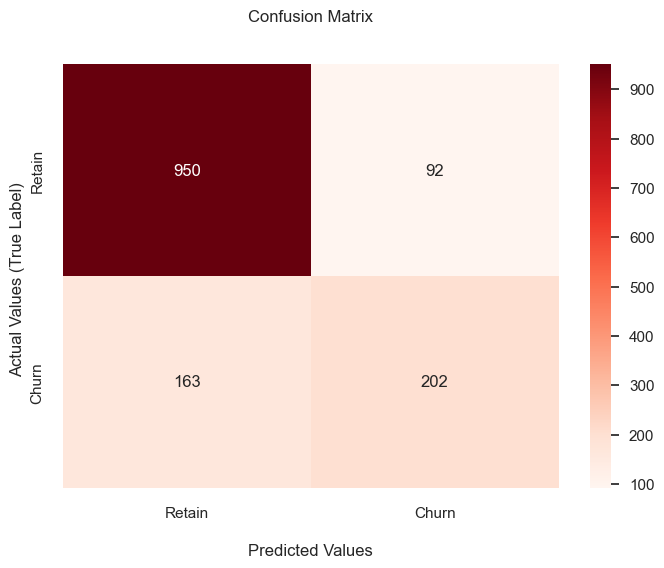

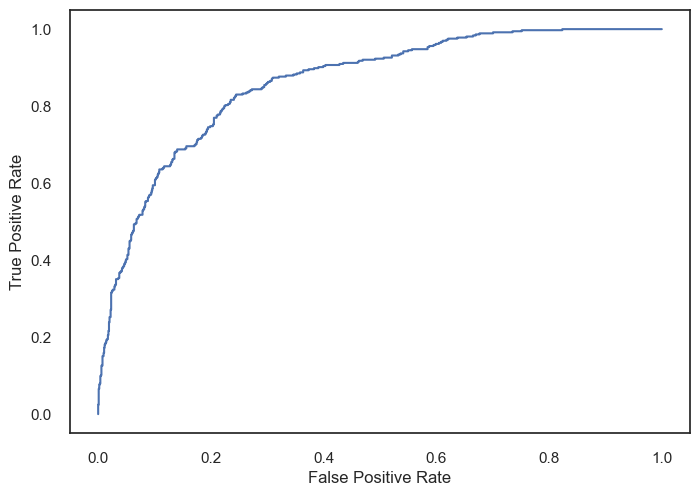

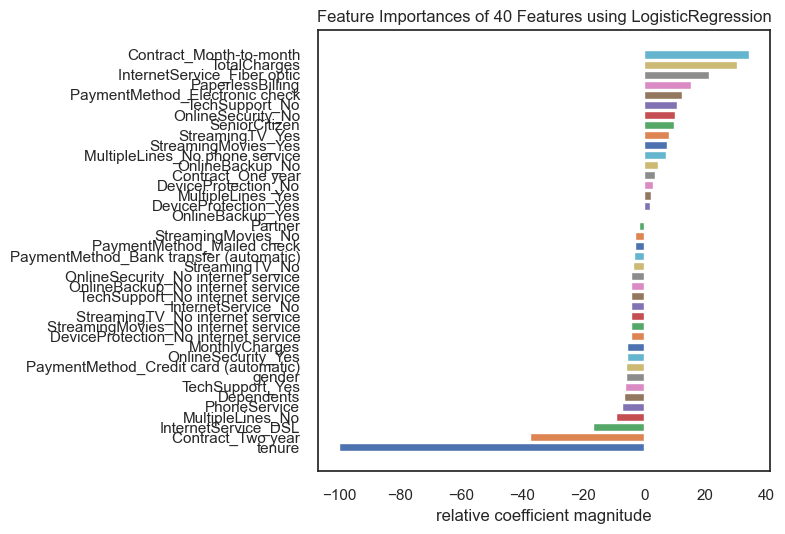

Model name:  LogisticRegression (SMOTE)
Algorithm: LogisticRegression
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1042
           1       0.59      0.70      0.64       365

    accuracy                           0.80      1407
   macro avg       0.74      0.77      0.75      1407
weighted avg       0.81      0.80      0.80      1407

Area under the roc curve: 0.7666421265742906 



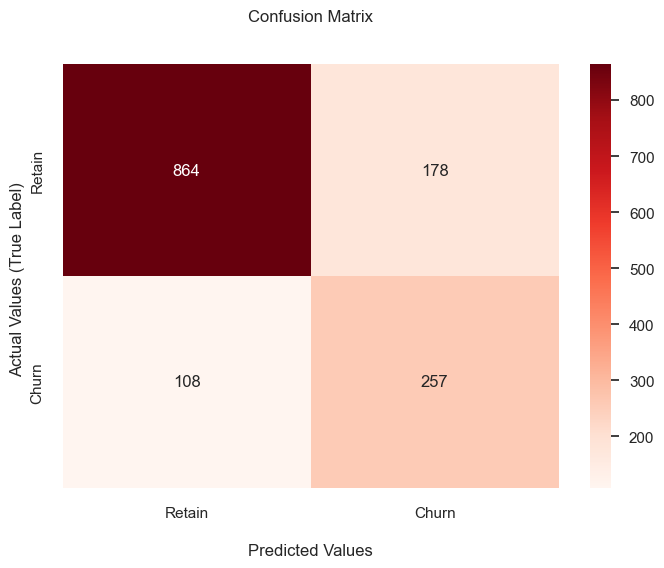

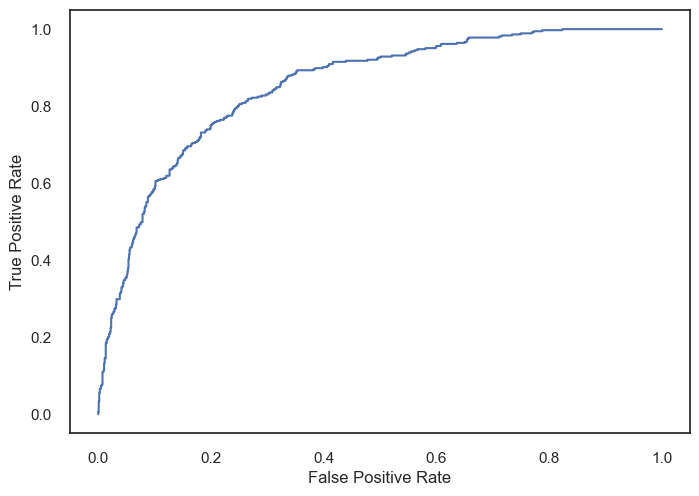

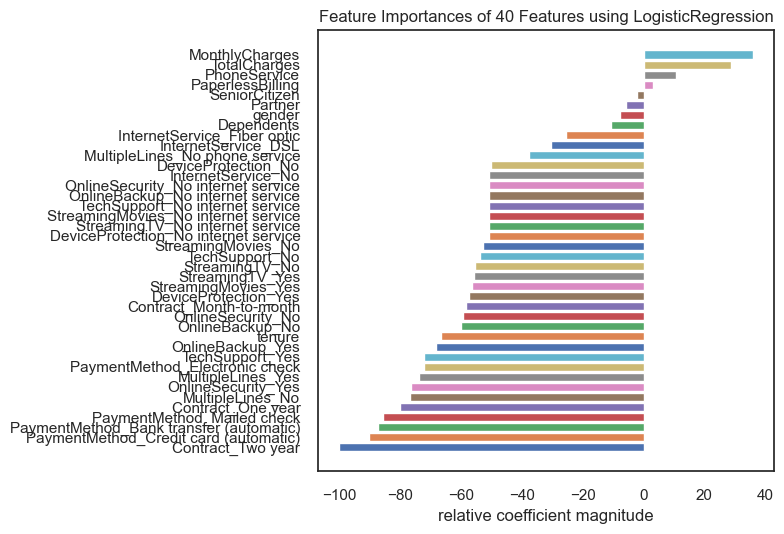

Model name:  LogisticRegression (RFE)
Algorithm: LogisticRegression
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1042
           1       0.69      0.55      0.61       365

    accuracy                           0.82      1407
   macro avg       0.77      0.73      0.75      1407
weighted avg       0.81      0.82      0.81      1407

Area under the roc curve: 0.7325664554465858 



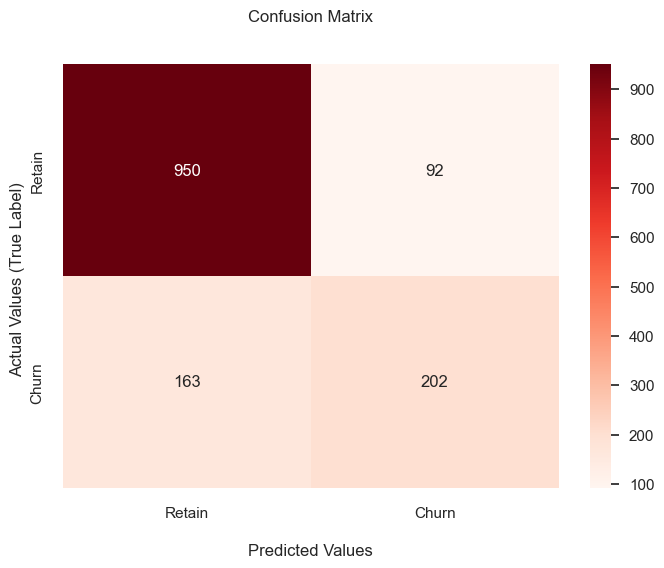

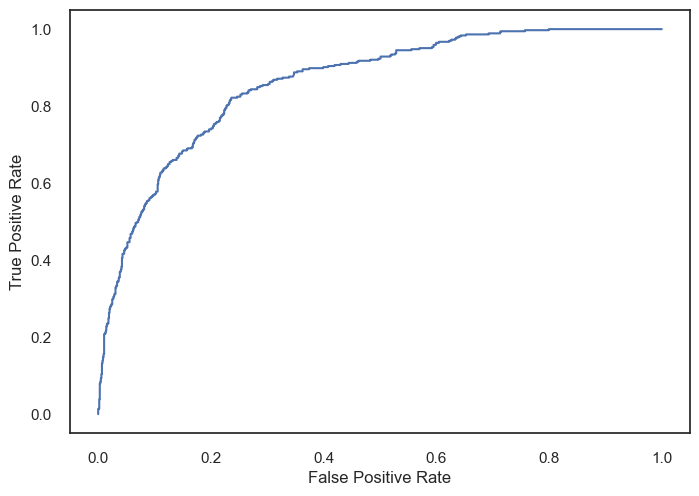

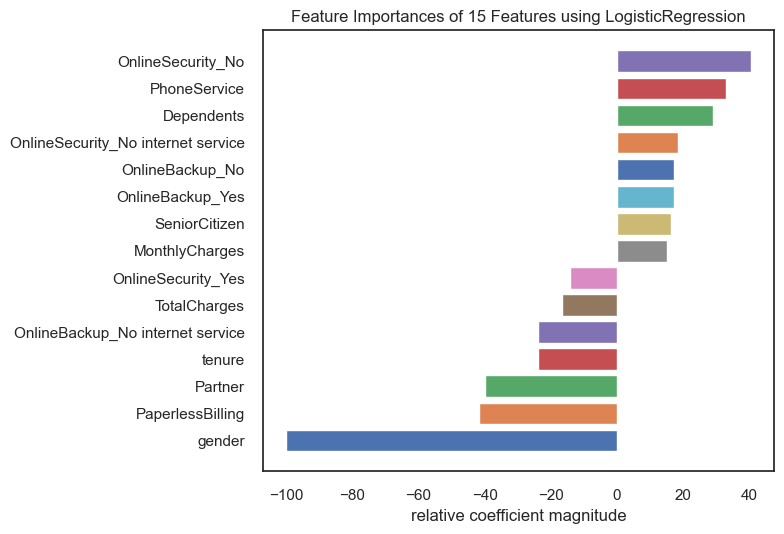

Model name:  LogisticRegression (SMOTE RFE)
Algorithm: LogisticRegression
              precision    recall  f1-score   support

           0       0.92      0.74      0.83      1042
           1       0.53      0.83      0.65       365

    accuracy                           0.77      1407
   macro avg       0.73      0.79      0.74      1407
weighted avg       0.82      0.77      0.78      1407

Area under the roc curve: 0.7860594746667369 



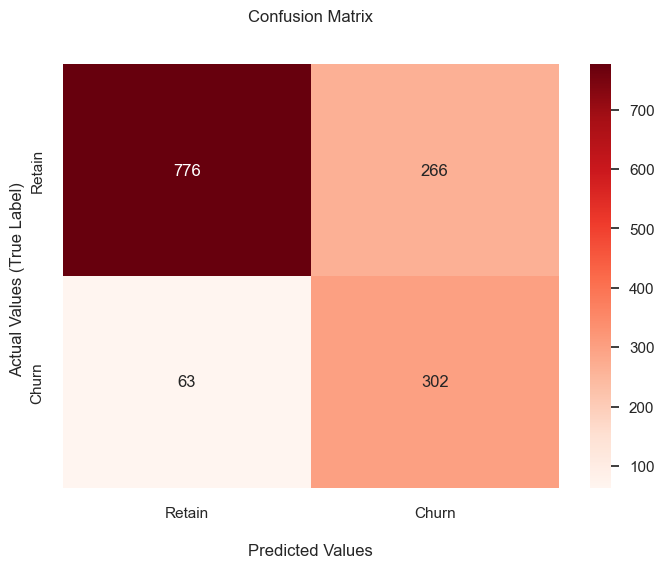

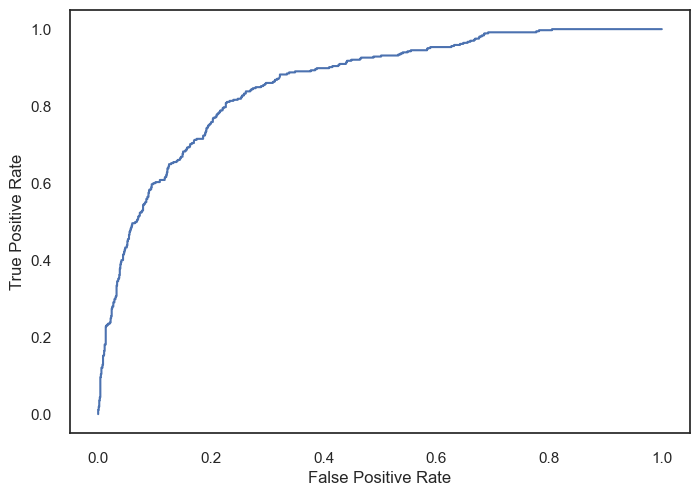

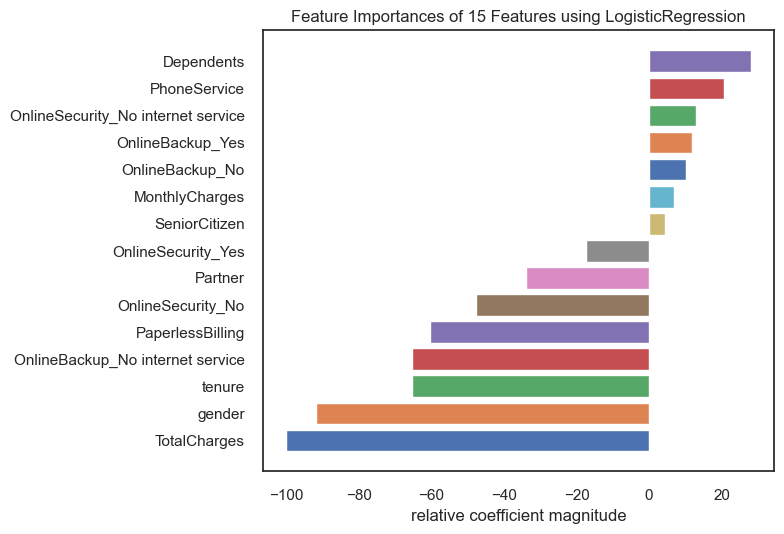

Model name:  DecisionTreeClassifier
Algorithm: DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1042
           1       0.60      0.55      0.57       365

    accuracy                           0.79      1407
   macro avg       0.72      0.71      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Area under the roc curve: 0.7091933321063287 



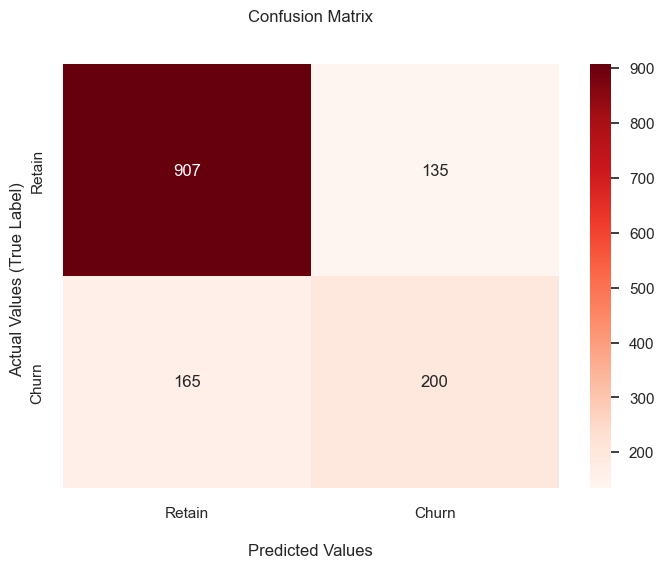

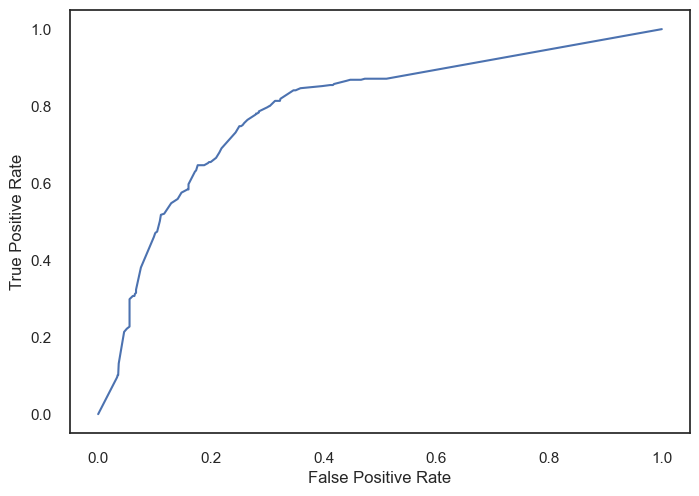

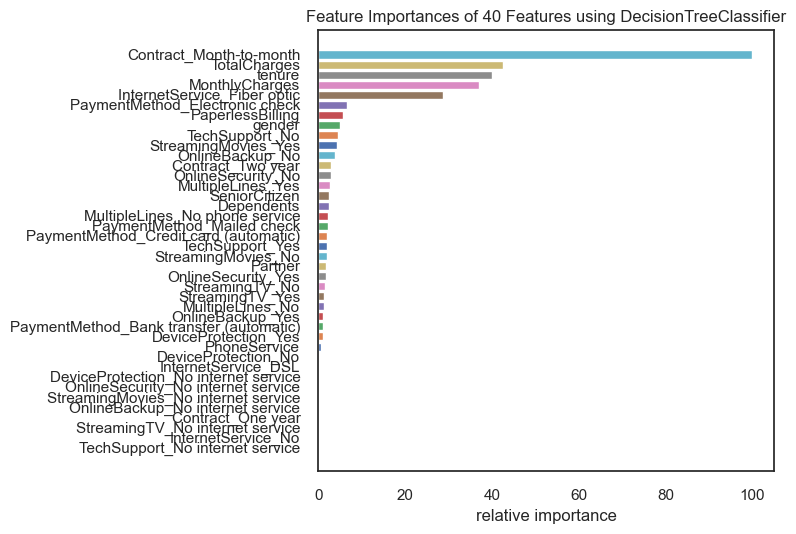

Model name:  DecisionTreeClassifier (SMOTE)
Algorithm: DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.89      0.77      0.82      1042
           1       0.52      0.72      0.61       365

    accuracy                           0.76      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.79      0.76      0.77      1407

Area under the roc curve: 0.7460008413745958 



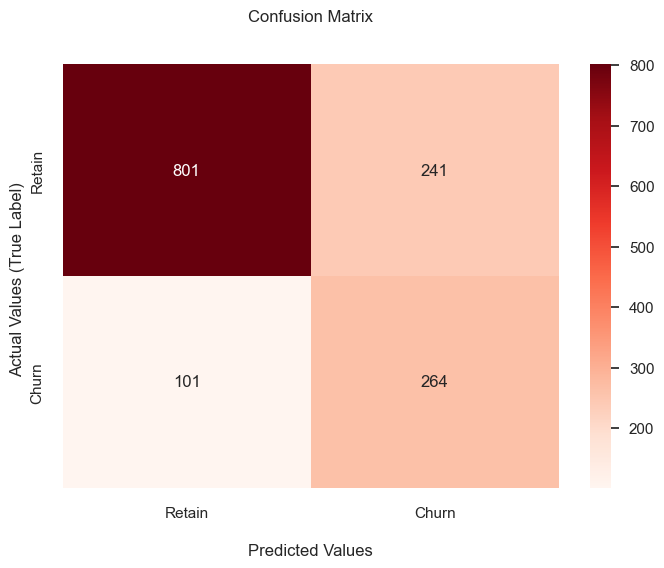

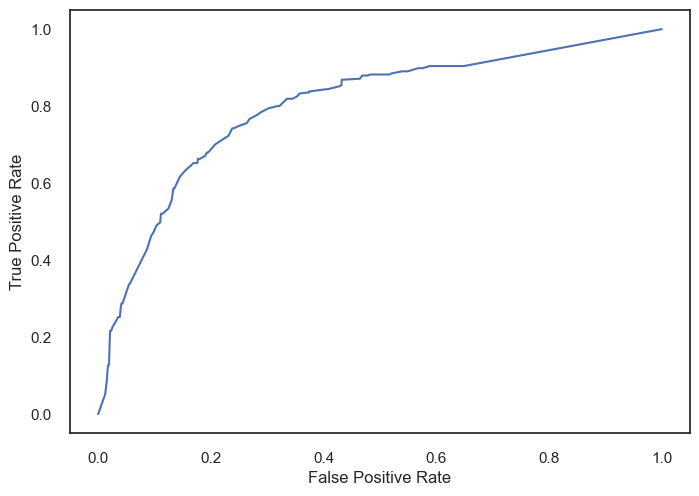

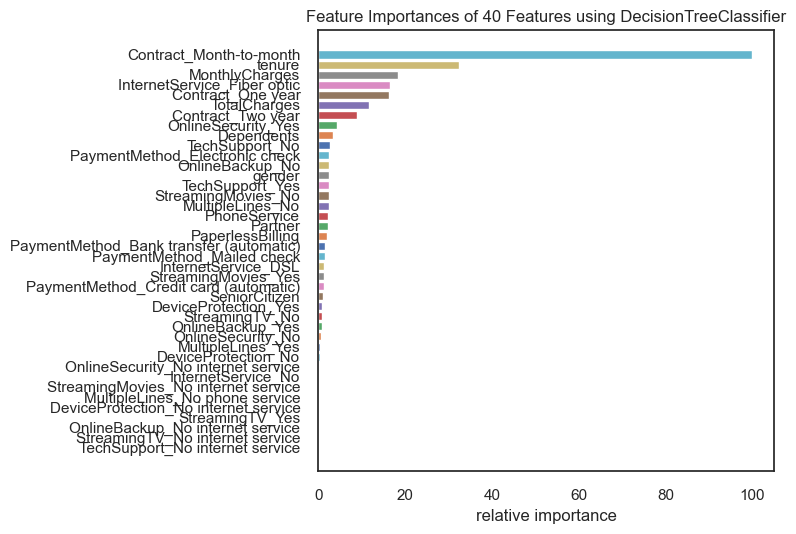

Model name:  DecisionTreeClassifier (RFE)
Algorithm: DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1042
           1       0.62      0.54      0.58       365

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.79      0.79      0.79      1407

Area under the roc curve: 0.7122117634685667 



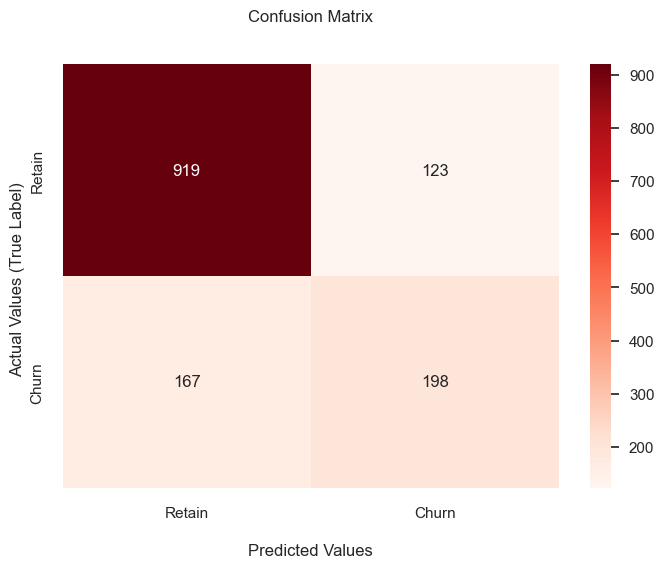

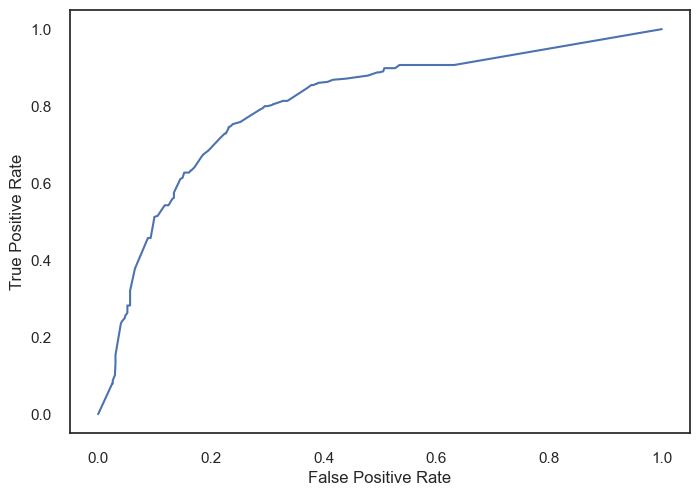

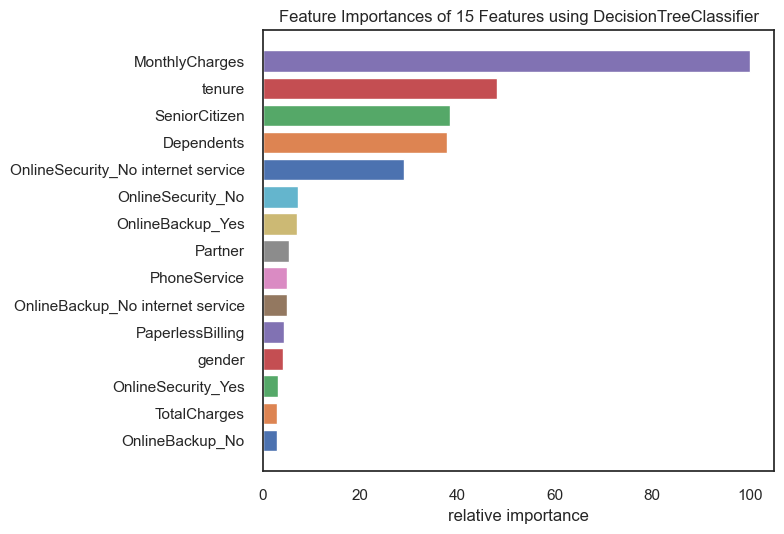

Model name:  DecisionTreeClassifier (SMOTE RFE)
Algorithm: DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.90      0.76      0.83      1042
           1       0.53      0.76      0.62       365

    accuracy                           0.76      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.80      0.76      0.77      1407

Area under the roc curve: 0.7622998448715589 



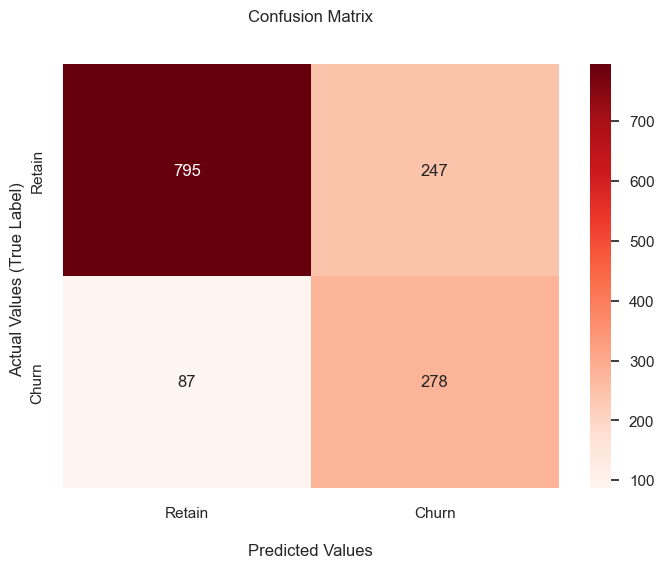

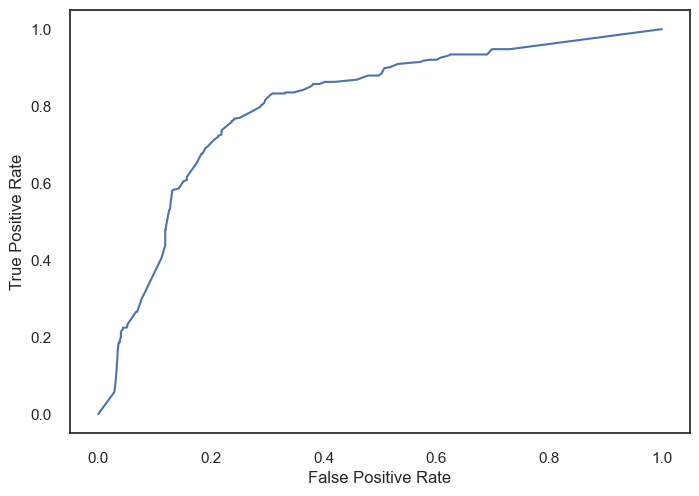

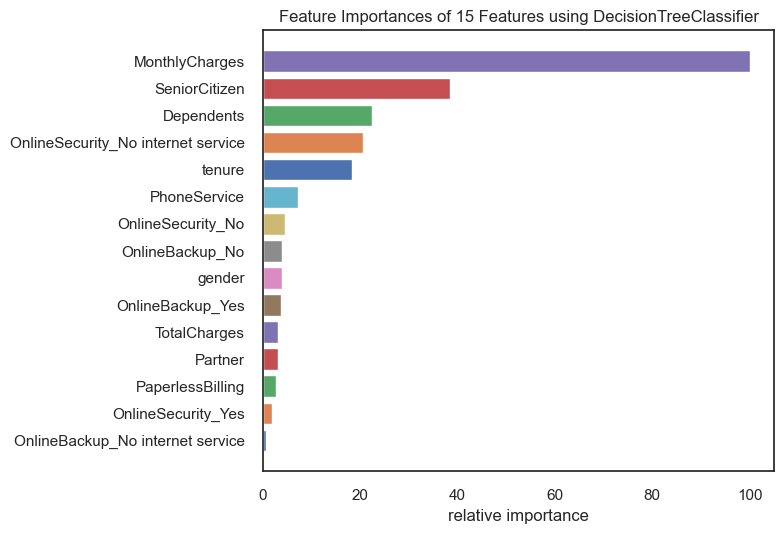

Model name:  RandomForestClassifier
Algorithm: RandomForestClassifier
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1042
           1       0.72      0.51      0.60       365

    accuracy                           0.82      1407
   macro avg       0.78      0.72      0.74      1407
weighted avg       0.81      0.82      0.81      1407

Area under the roc curve: 0.7192858833118607 



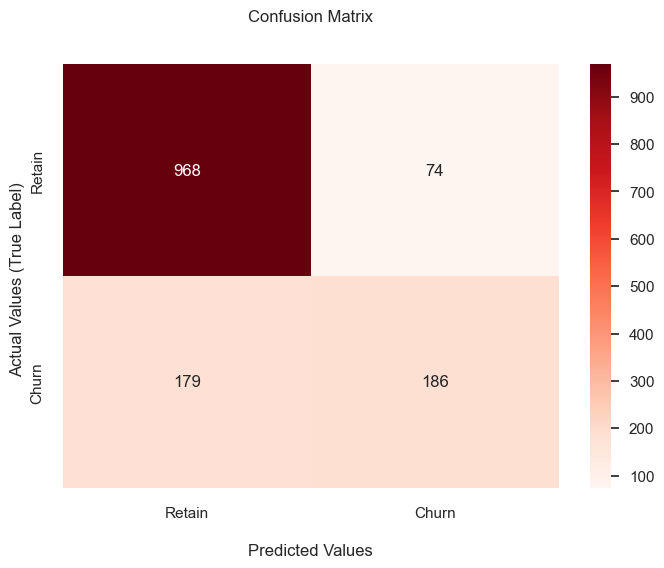

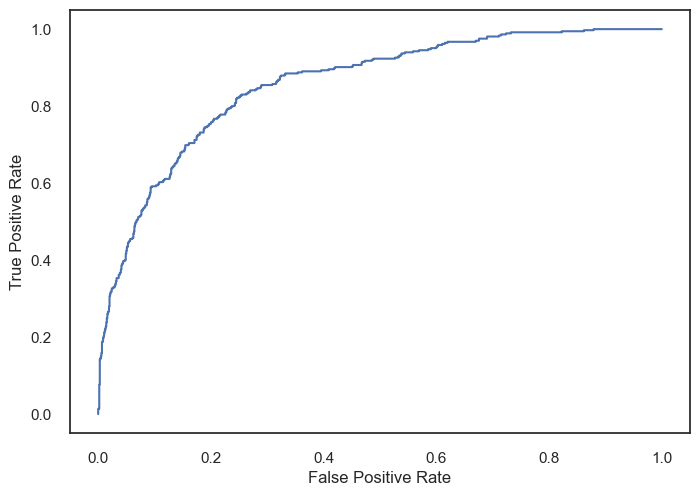

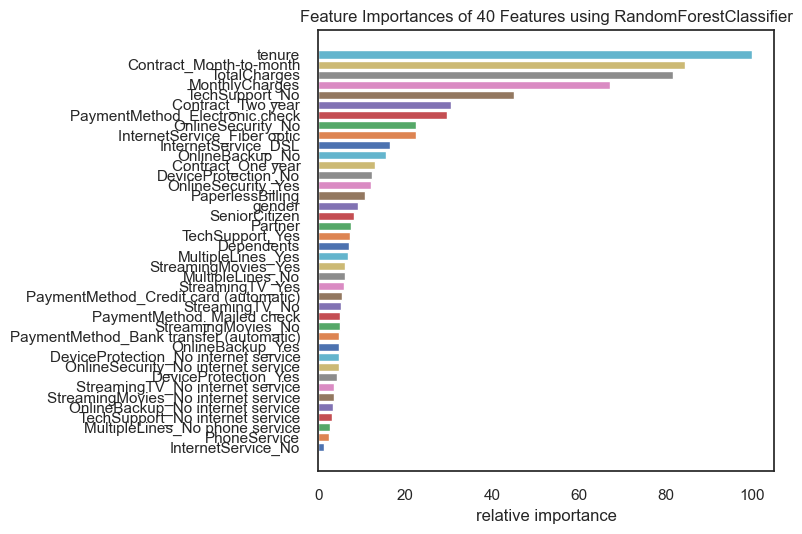

Model name:  RandomForestClassifier (SMOTE)
Algorithm: RandomForestClassifier
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1042
           1       0.56      0.76      0.64       365

    accuracy                           0.78      1407
   macro avg       0.73      0.77      0.74      1407
weighted avg       0.81      0.78      0.79      1407

Area under the roc curve: 0.7738858359845399 



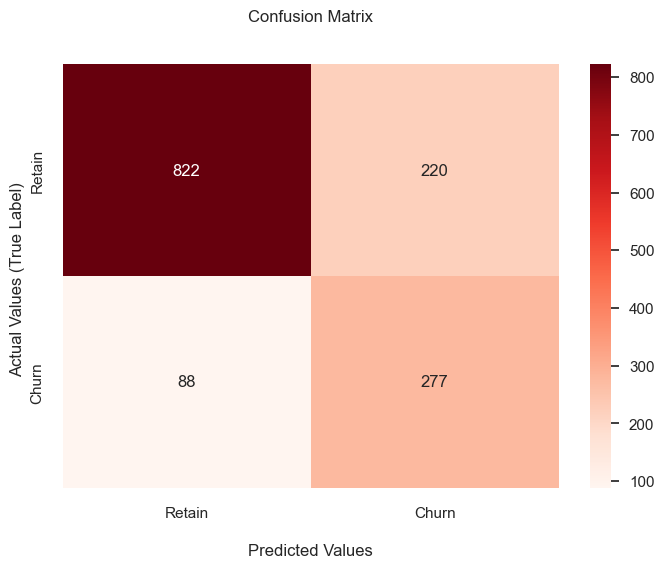

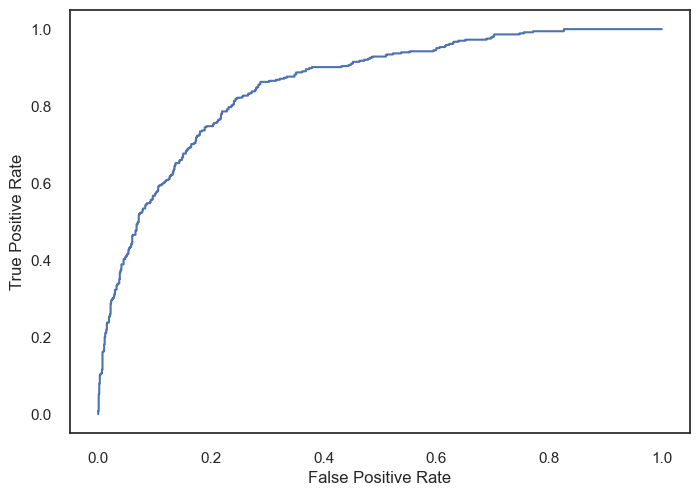

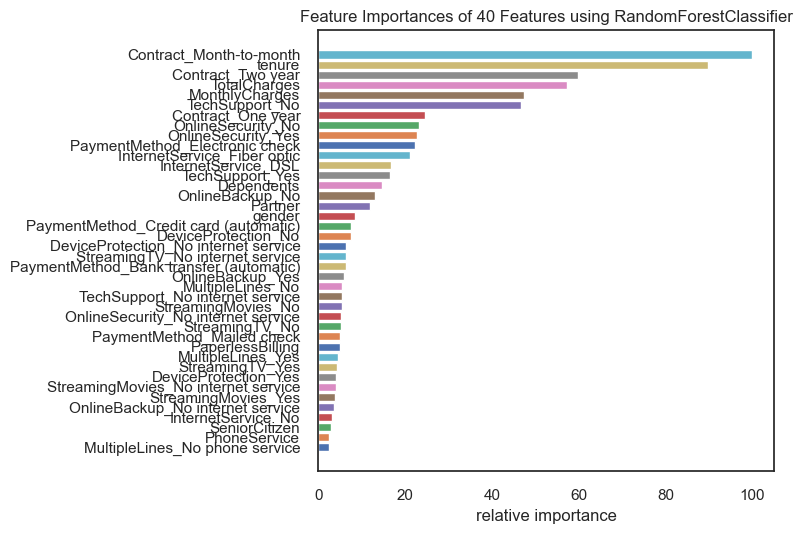

Model name:  RandomForestClassifier (RFE)
Algorithm: RandomForestClassifier
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1042
           1       0.69      0.51      0.58       365

    accuracy                           0.81      1407
   macro avg       0.76      0.71      0.73      1407
weighted avg       0.80      0.81      0.80      1407

Area under the roc curve: 0.7140075723713617 



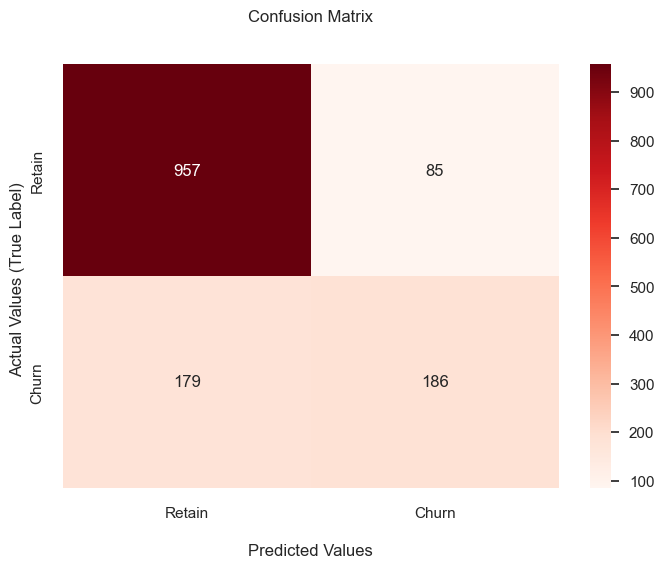

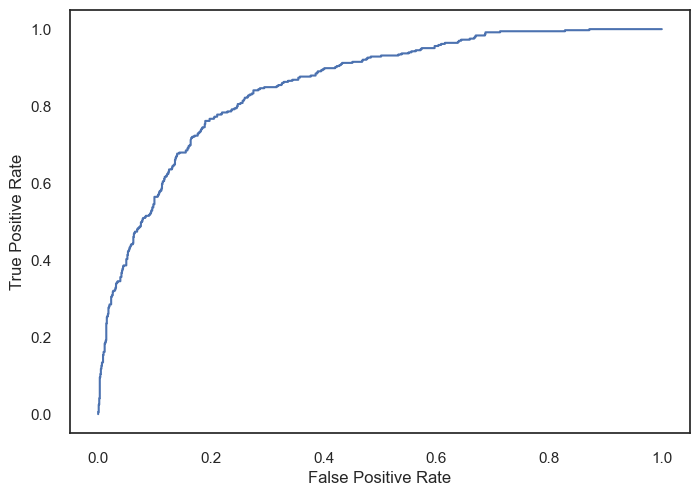

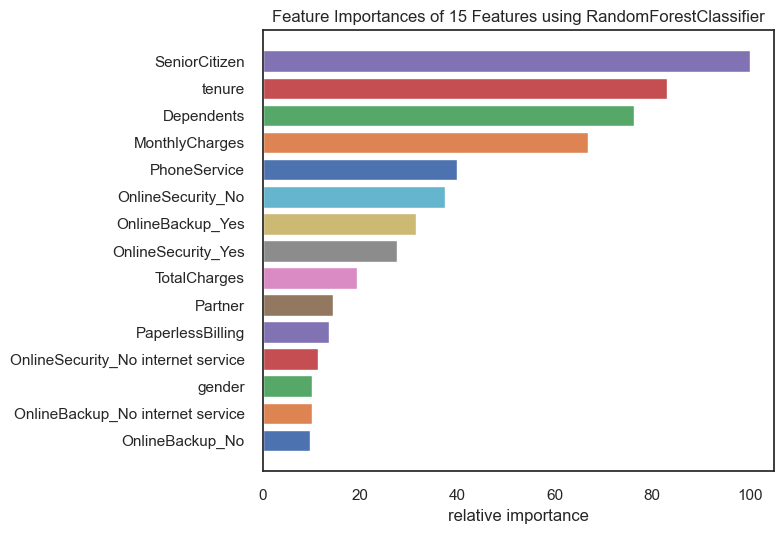

Model name:  RandomForestClassifier (SMOTE RFE)
Algorithm: RandomForestClassifier
              precision    recall  f1-score   support

           0       0.91      0.79      0.84      1042
           1       0.56      0.78      0.65       365

    accuracy                           0.78      1407
   macro avg       0.73      0.78      0.75      1407
weighted avg       0.82      0.78      0.79      1407

Area under the roc curve: 0.7806654747193227 



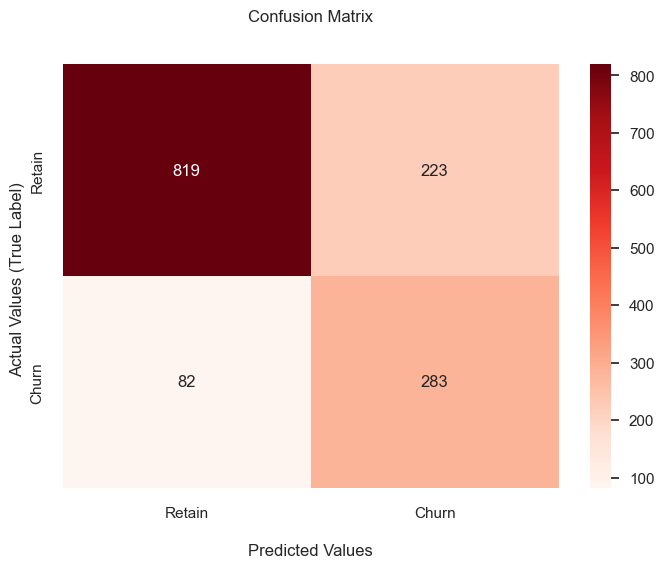

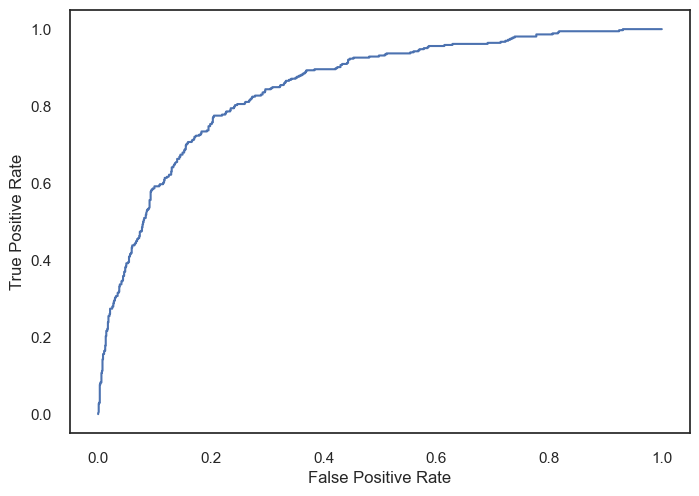

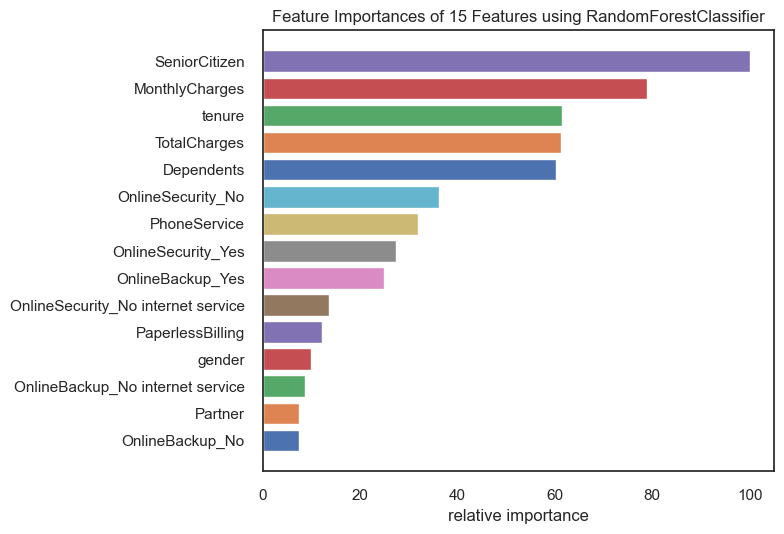

Model name:  GaussianNB
Algorithm: GaussianNB
              precision    recall  f1-score   support

           0       0.92      0.64      0.75      1042
           1       0.45      0.85      0.59       365

    accuracy                           0.69      1407
   macro avg       0.69      0.74      0.67      1407
weighted avg       0.80      0.69      0.71      1407

Area under the roc curve: 0.741425867010228 



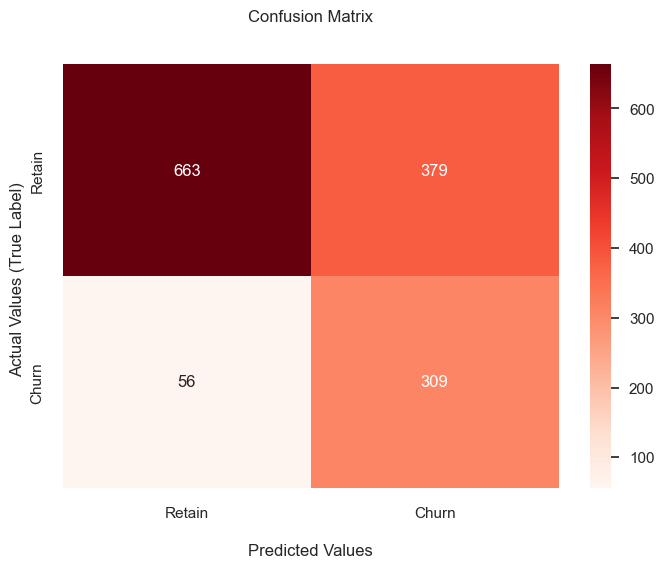

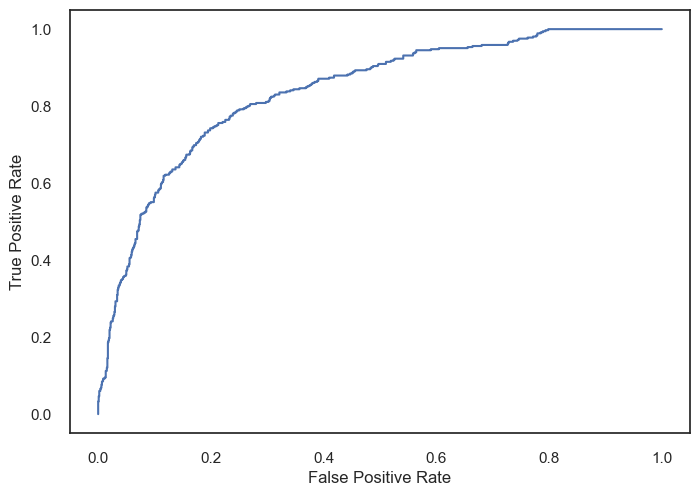

Model name:  GaussianNB (SMOTE)
Algorithm: GaussianNB
              precision    recall  f1-score   support

           0       0.92      0.67      0.77      1042
           1       0.47      0.83      0.60       365

    accuracy                           0.71      1407
   macro avg       0.69      0.75      0.68      1407
weighted avg       0.80      0.71      0.73      1407

Area under the roc curve: 0.7476717587358346 



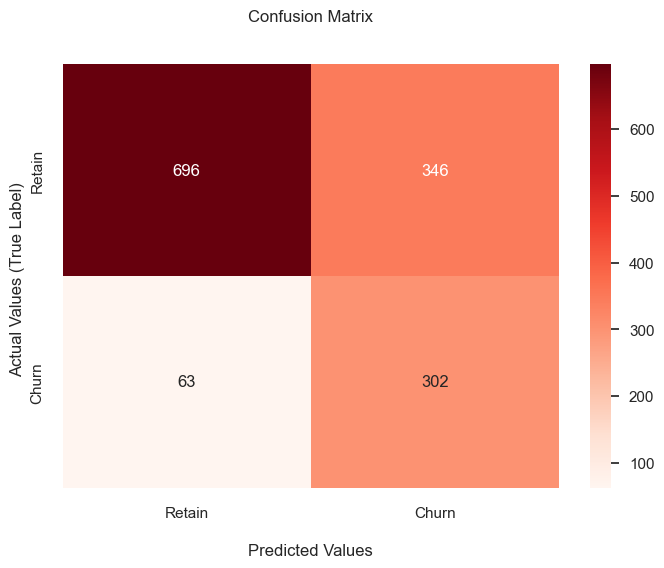

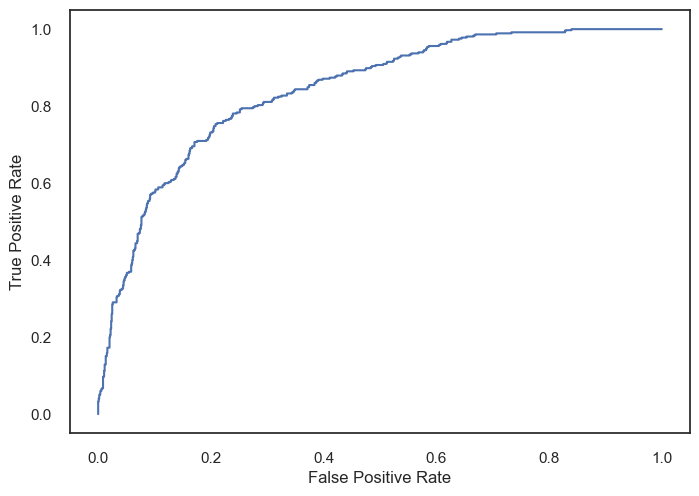

Model name:  SVC (linear)
Algorithm: SVC
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1042
           1       0.69      0.55      0.61       365

    accuracy                           0.82      1407
   macro avg       0.77      0.73      0.75      1407
weighted avg       0.81      0.82      0.81      1407

Area under the roc curve: 0.7316764388820235 



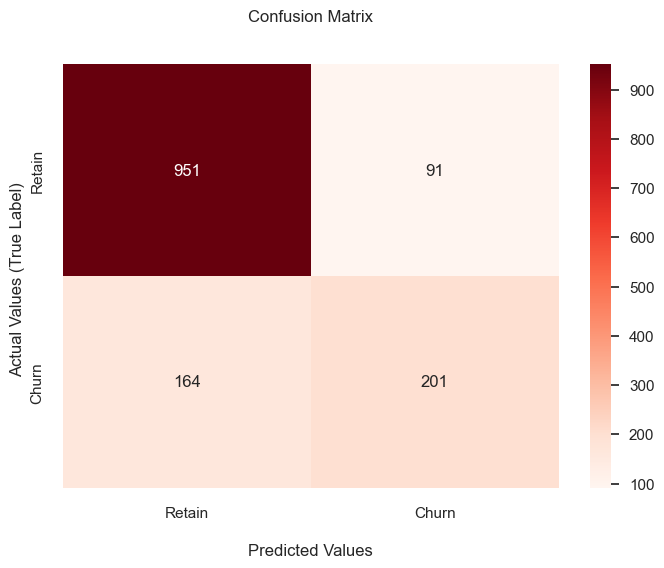

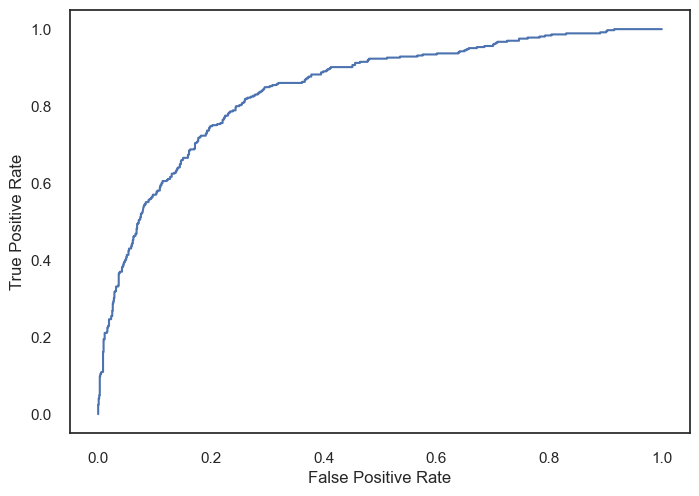

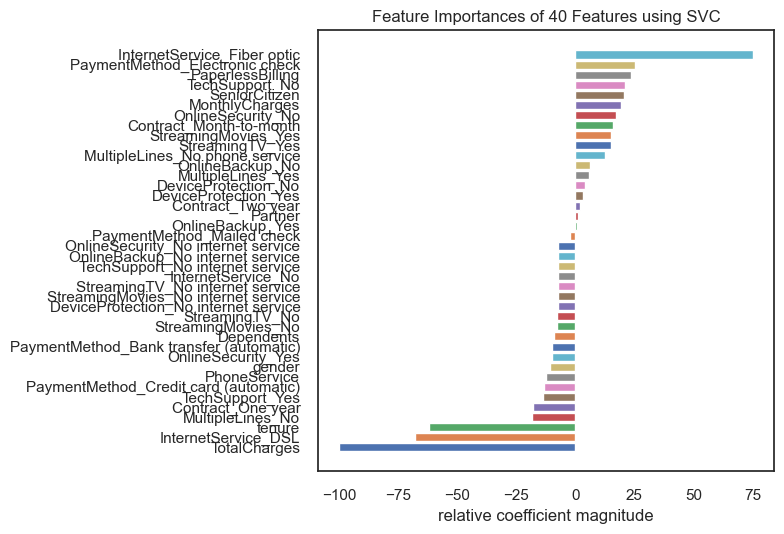

Model name:  SVC (linear) (SMOTE)
Algorithm: SVC
              precision    recall  f1-score   support

           0       0.89      0.84      0.87      1042
           1       0.61      0.70      0.65       365

    accuracy                           0.81      1407
   macro avg       0.75      0.77      0.76      1407
weighted avg       0.82      0.81      0.81      1407

Area under the roc curve: 0.7711000972839377 



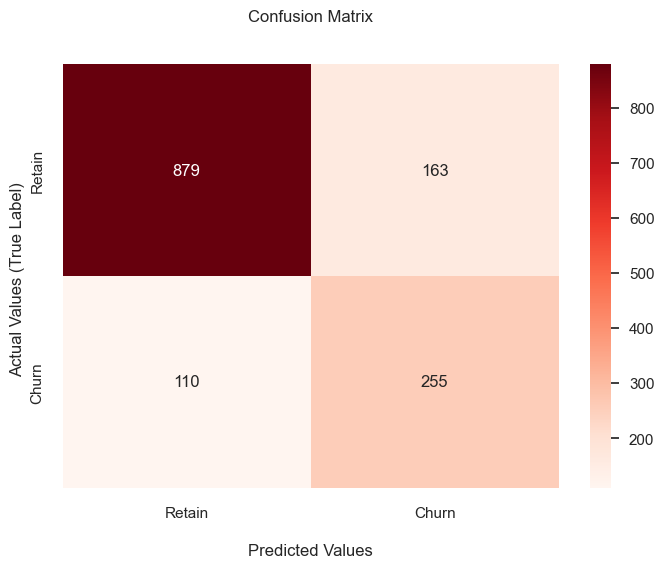

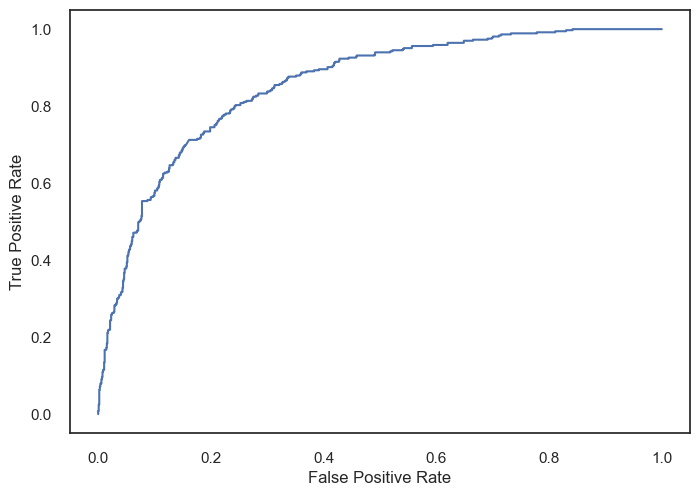

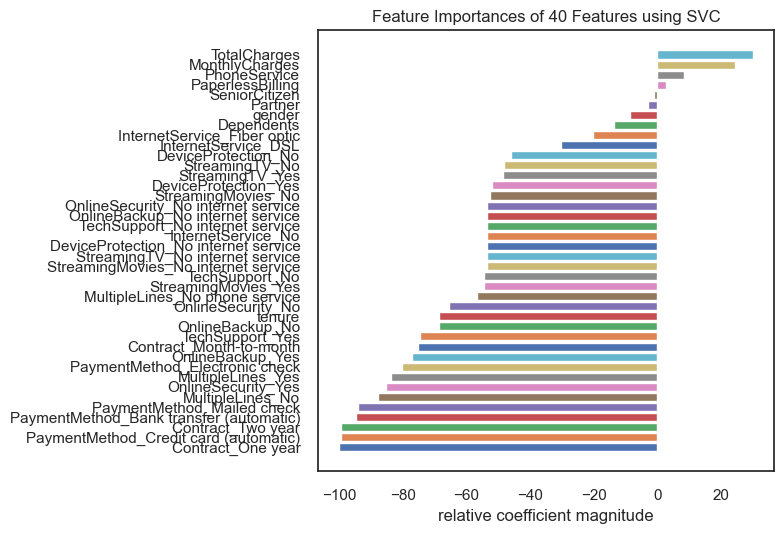

Model name:  XGBoost
Algorithm: XGBClassifier
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1042
           1       0.60      0.50      0.54       365

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1407

Area under the roc curve: 0.6902939552493886 



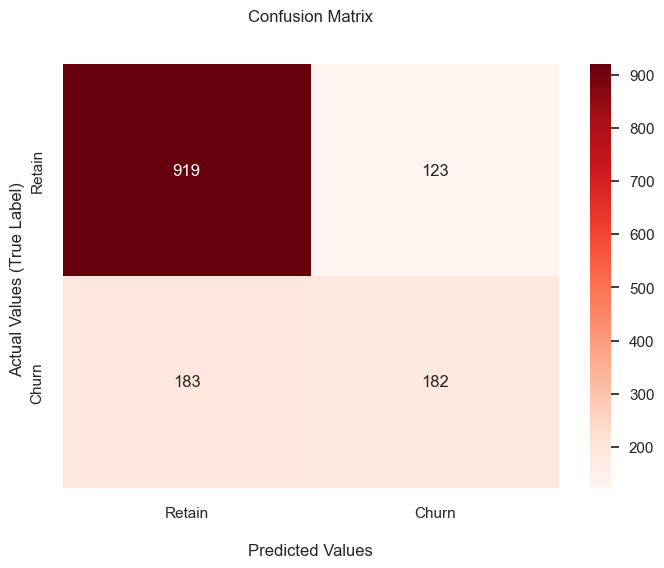

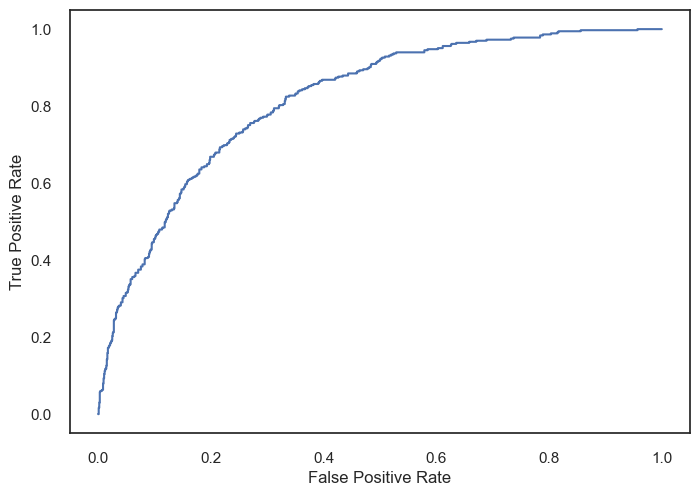

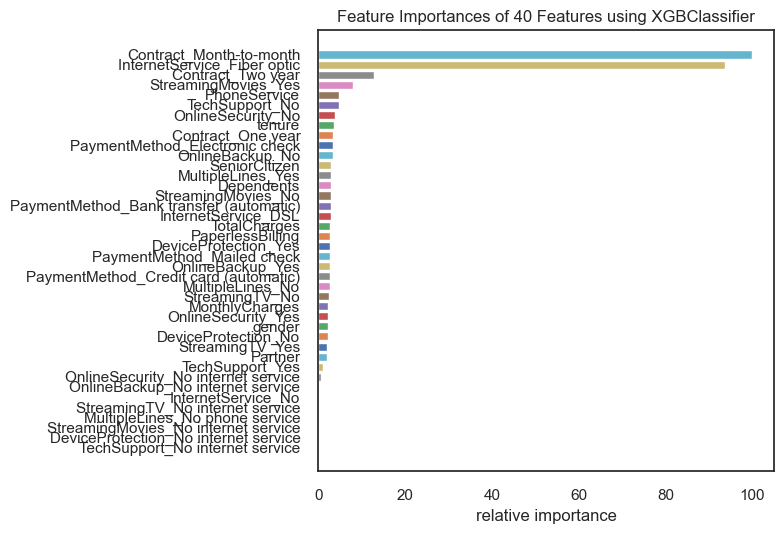

Model name:  XGBoost (SMOTE)
Algorithm: XGBClassifier
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1042
           1       0.56      0.55      0.55       365

    accuracy                           0.77      1407
   macro avg       0.70      0.70      0.70      1407
weighted avg       0.77      0.77      0.77      1407

Area under the roc curve: 0.6971971708779217 



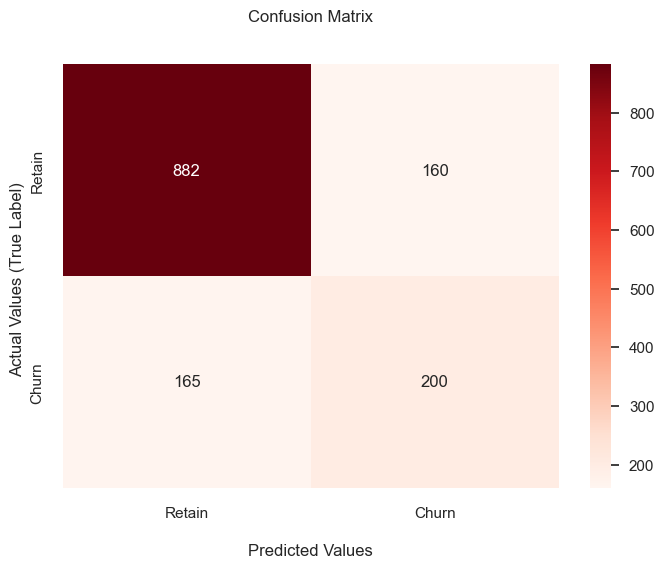

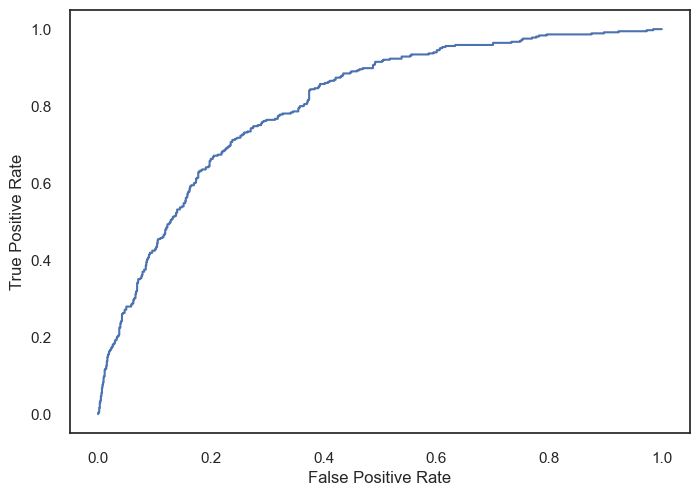

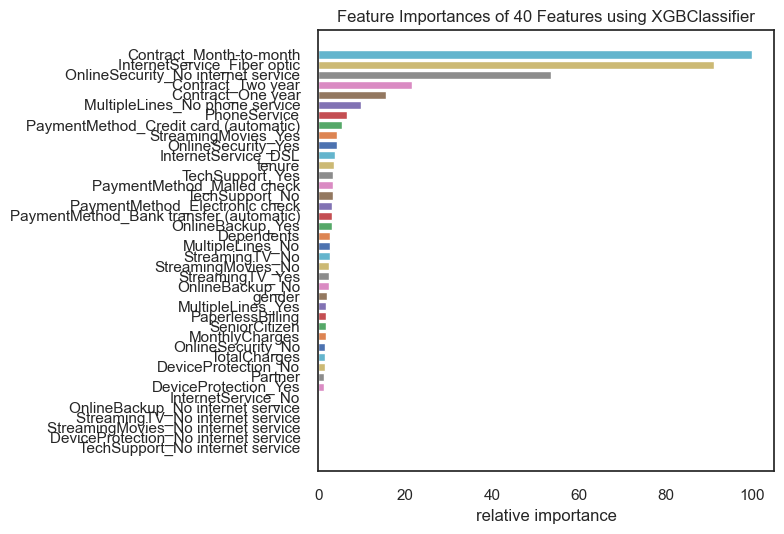

Model name:  AdaBoost
Algorithm: AdaBoostClassifier
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1042
           1       0.69      0.52      0.59       365

    accuracy                           0.82      1407
   macro avg       0.77      0.72      0.74      1407
weighted avg       0.81      0.82      0.81      1407

Area under the roc curve: 0.7199668708752924 



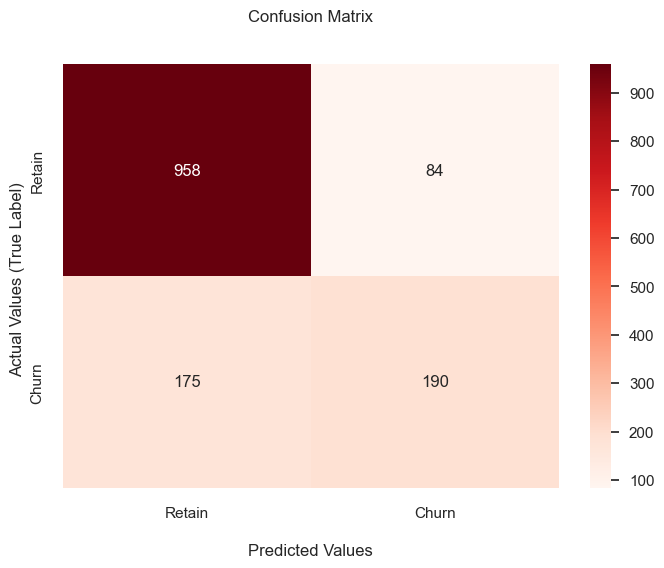

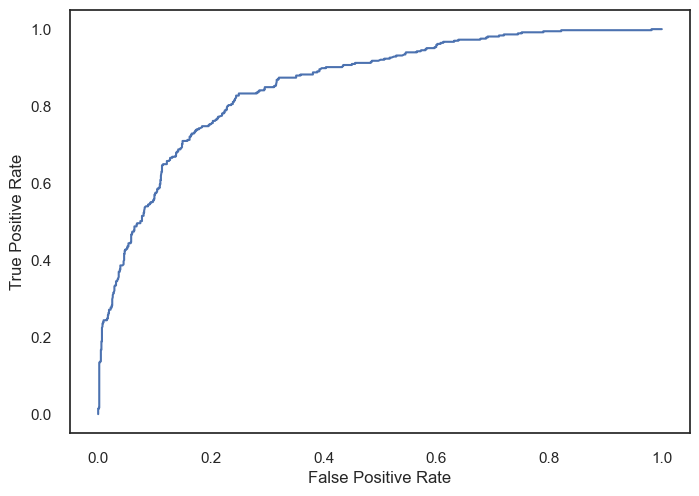

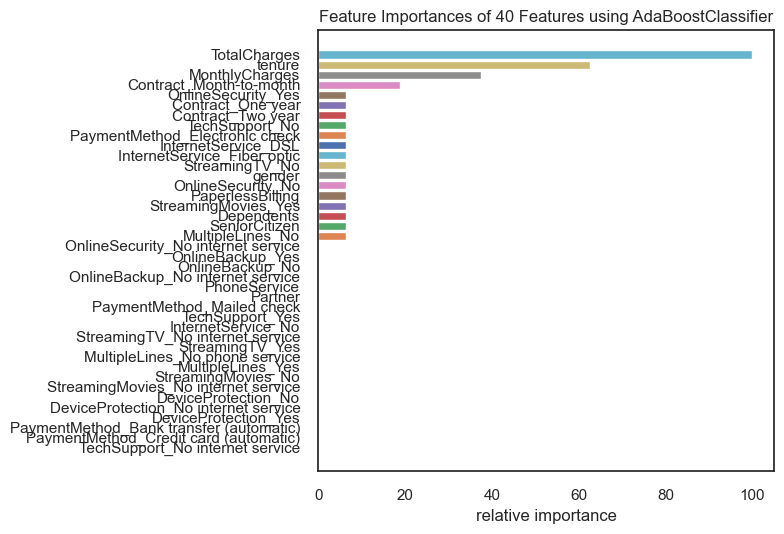

Model name:  AdaBoost (SMOTE)
Algorithm: AdaBoostClassifier
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1042
           1       0.55      0.77      0.64       365

    accuracy                           0.78      1407
   macro avg       0.73      0.77      0.74      1407
weighted avg       0.81      0.78      0.79      1407

Area under the roc curve: 0.7744971472142613 



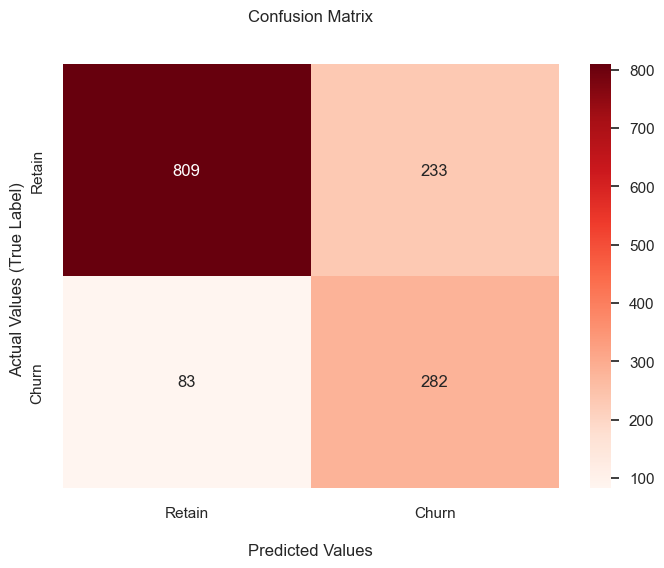

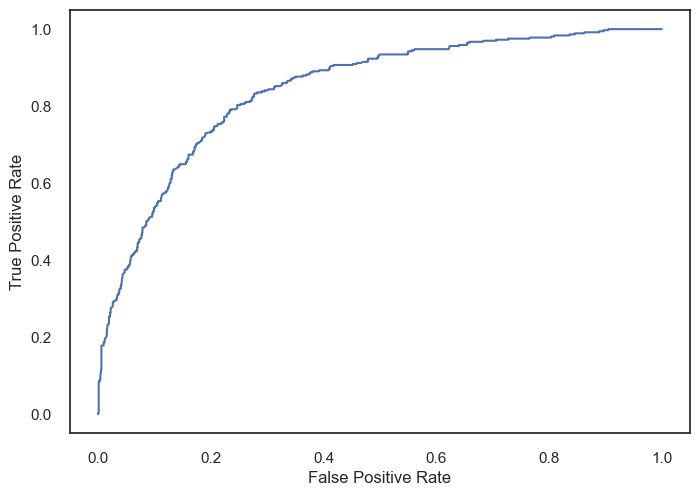

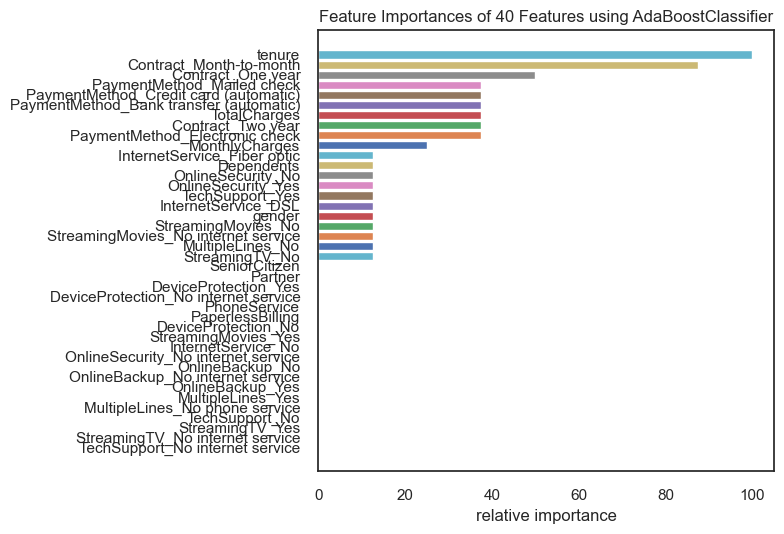

Model name:  GradientBoost
Algorithm: GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1042
           1       0.70      0.55      0.62       365

    accuracy                           0.82      1407
   macro avg       0.78      0.73      0.75      1407
weighted avg       0.81      0.82      0.82      1407

Area under the roc curve: 0.7336655010122788 



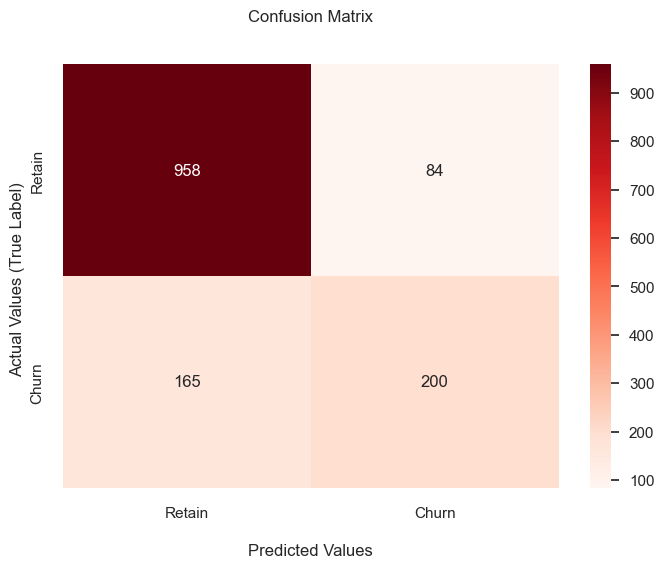

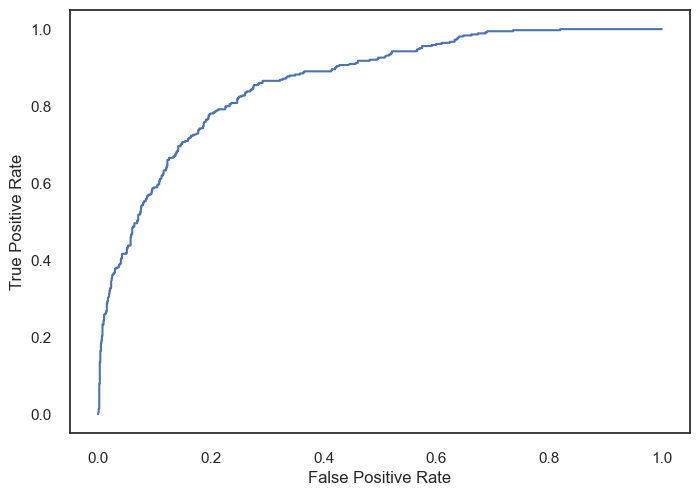

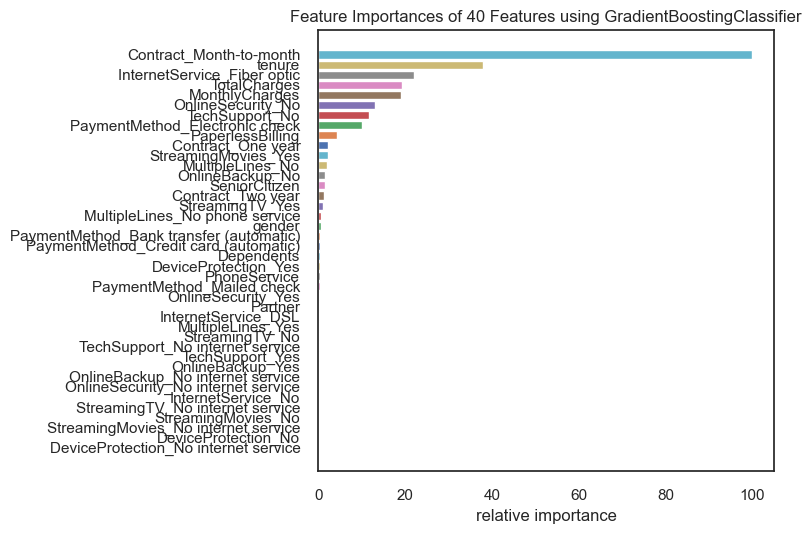

Model name:  GradientBoost (SMOTE)
Algorithm: GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1042
           1       0.57      0.74      0.64       365

    accuracy                           0.79      1407
   macro avg       0.73      0.77      0.75      1407
weighted avg       0.81      0.79      0.79      1407

Area under the roc curve: 0.7706044750611312 



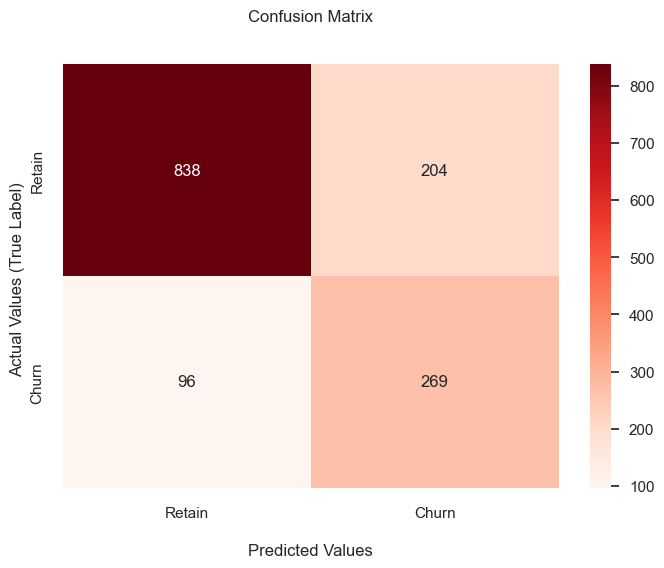

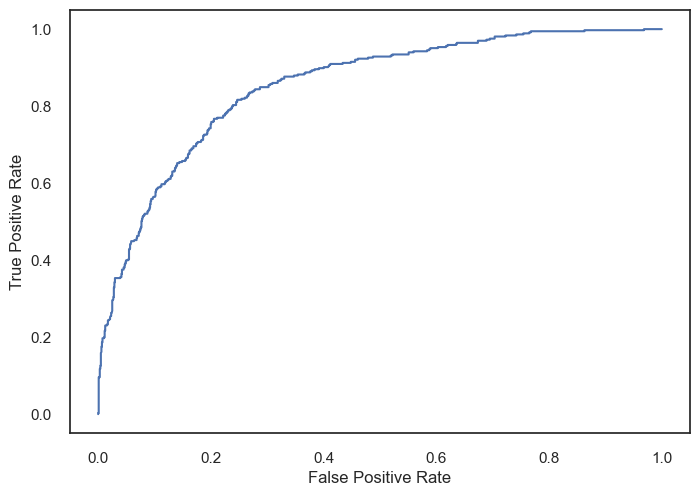

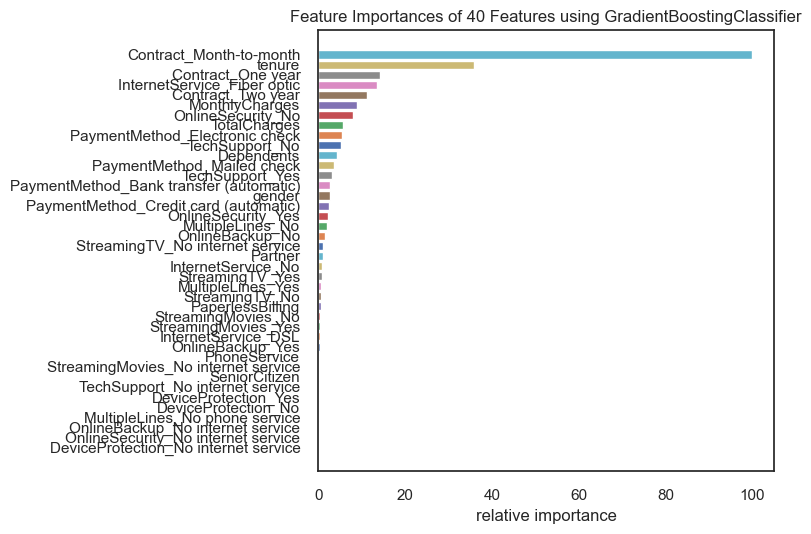

In [16]:
performances_df = ml_classification(show_stat=True)

In [17]:
import plotly.figure_factory as ff # visualization
import plotly.offline as plotly_py # visualization
plotly_py.init_notebook_mode(connected=True) # visualization

colorscale = [[0, '#4d004c'],[.5, '#f2e5ff'],[1, '#ffffff']]

table = ff.create_table(np.round(performances_df, 4), colorscale=colorscale)
table.layout.font.size = 10
# for i in range(len(table.layout.annotations)):
#     if i == 0:
#         table.layout.annotations[i].font.size = 10
#     else:
#         table.layout.annotations[i].align = 'left'
plotly_py.iplot(table)

In [18]:
sorted_df = performances_df.sort_values(by=['f1-score'], ascending=False)
colorscale = [[0, '#4d004c'],[.5, '#f2e5ff'],[1, '#ffffff']]

table = ff.create_table(np.round(sorted_df, 4), colorscale=colorscale)
table.layout.font.size = 10
# for i in range(len(table.layout.annotations)):
#     if i == 0:
#         table.layout.annotations[i].font.size = 10
#     else:
#         table.layout.annotations[i].align = 'left'
plotly_py.iplot(table)

In [19]:
sorted_df = performances_df.sort_values(by=['Roc_auc'], ascending=False)
colorscale = [[0, '#4d004c'],[.5, '#f2e5ff'],[1, '#ffffff']]

table = ff.create_table(np.round(sorted_df, 4), colorscale=colorscale)
table.layout.font.size = 10
# for i in range(len(table.layout.annotations)):
#     if i == 0:
#         table.layout.annotations[i].font.size = 10
#     else:
#         table.layout.annotations[i].align = 'left'
plotly_py.iplot(table)

In [21]:
len(X_test.columns)

40